In [74]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [75]:
my_data = pd.read_csv("play_tennis.csv", delimiter=",")
my_data[0:5]

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [76]:
my_data=my_data.drop(['day'], axis=1)
my_data[0:5]

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [77]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

my_data['outlook'] = Le.fit_transform(my_data['outlook'])
my_data['temp'] = Le.fit_transform(my_data['temp'])
my_data['humidity'] = Le.fit_transform(my_data['humidity'])
my_data['wind'] = Le.fit_transform(my_data['wind'])


In [78]:
my_data[0:5]

,outlook,temp,humidity,wind,play
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes


In [79]:
y=my_data['play']
x=my_data.drop(['play'], axis=1)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [82]:
print("shape of X_trainset: ",X_trainset.shape)
print("shape of y_trainset: ", y_trainset.shape)


shape of X_trainset:  (9, 4)
shape of y_trainset:  (9,)


In [83]:
print("shape of X_testset: ",X_testset.shape)
print("shape of y_testset: ", y_testset.shape)

shape of X_testset:  (5, 4)
shape of y_testset:  (5,)


In [84]:
tennisTree = DecisionTreeClassifier(criterion="entropy")
tennisTree 

DecisionTreeClassifier(criterion='entropy')

In [85]:
tennisTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [86]:
predTree = tennisTree.predict(X_testset)
print (predTree [0:5])
print("\n")
print (y_testset [0:5])


['Yes' 'Yes' 'No' 'Yes' 'Yes']


7      No
4     Yes
1      No
2     Yes
13     No
Name: play, dtype: object


In [87]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6


In [88]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [89]:
dot_data = StringIO()
filename = "tennisTree.png"
featureNames = my_data.columns[0:4]
targetNames = my_data["play"].unique().tolist()
out=tree.export_graphviz(tennisTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)

True

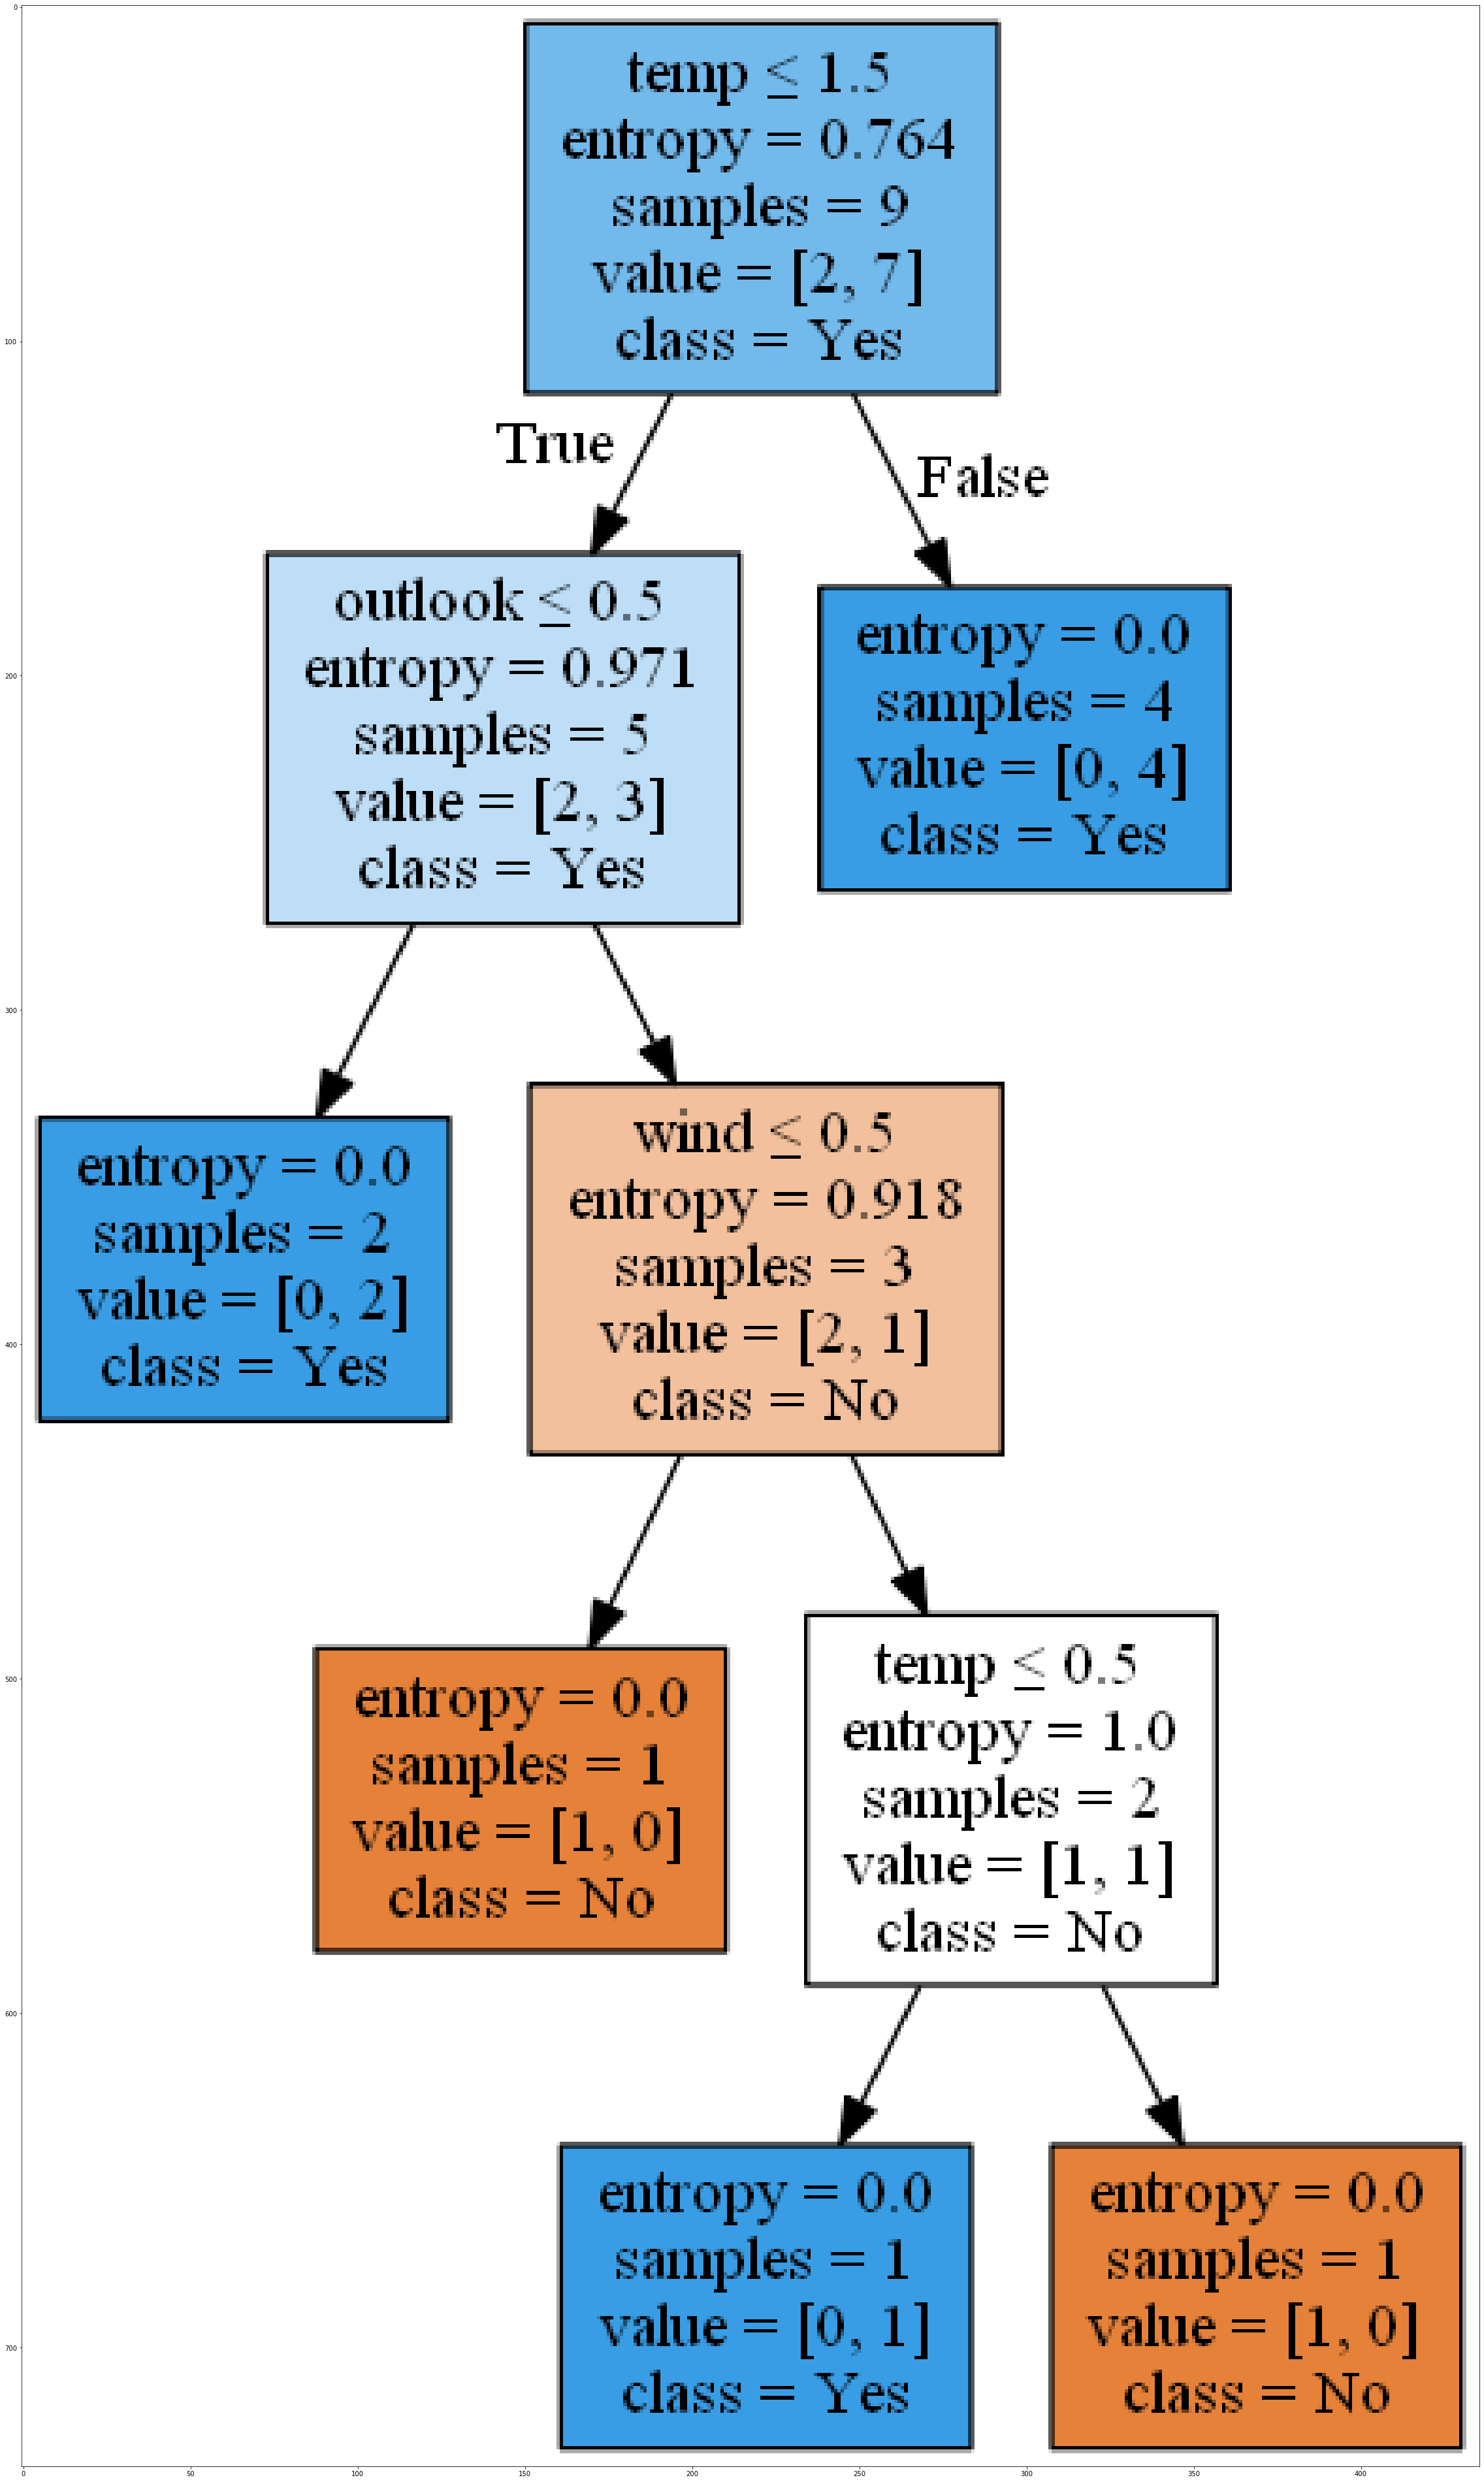

In [90]:
img = mpimg.imread(filename)
plt.figure(figsize=(40, 70))
plt.imshow(img,interpolation='nearest')